In [1]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
password = getpass.getpass()

········


In [63]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/bank'
engine = create_engine(connection_string)


In [64]:
data = pd.read_sql_query('SELECT * FROM loan', connection_string)
data.head()

,loan_id,account_id,date,amount,duration,payments,status,status_desc
0,5314,1787,930705,96396,12,8033.0,B,Defaulter - Contract Finished
1,5316,1801,930711,165960,36,4610.0,A,Good - Contract Finished
2,6863,9188,930728,127080,60,2118.0,A,Good - Contract Finished
3,5325,1843,930803,105804,36,2939.0,A,Good - Contract Finished
4,7240,11013,930906,274740,60,4579.0,A,Good - Contract Finished


In [65]:
data = pd.read_sql_table('trans', connection_string)
data.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,,,0
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,,,0
2,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,,,0
3,1117247,3818,930101,PRIJEM,VKLAD,600.0,600.0,,,0
4,579373,1972,930102,PRIJEM,VKLAD,400.0,400.0,,,0


In [66]:
data['type'].value_counts()

VYDAJ     513977
PRIJEM    339950
VYBER      14092
Name: type, dtype: int64

In [67]:
data['operation'].value_counts()

VYBER             391903
                  183112
PREVOD NA UCET    129484
VKLAD             115624
PREVOD Z UCTU      41214
VYBER KARTOU        6682
Name: operation, dtype: int64

In [68]:
import pandas as pd
pd.crosstab(data1['type'], data1['operation'])

operation,,PREVOD NA UCET,PREVOD Z UCTU,VKLAD,VYBER,VYBER KARTOU
type,,,,,,
PRIJEM,183112,0,41214,115624,0,0
VYBER,0,0,0,0,14092,0
VYDAJ,0,129484,0,0,377811,6682


In [69]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [71]:
numerical = data.select_dtypes(np.number)
numerical.head()

,trans_id,account_id,date,amount,balance,account
0,695247,2378,930101,700.0,700.0,0
1,171812,576,930101,900.0,900.0,0
2,207264,704,930101,1000.0,1000.0,0
3,1117247,3818,930101,600.0,600.0,0
4,579373,1972,930102,400.0,400.0,0


In [78]:
numerical.dtypes

trans_id        int64
account_id      int64
date           object
amount        float64
balance       float64
account         int64
dtype: object

In [81]:
numerical = numerical.drop(['trans_id', 'account_id', 'date', 'account'], axis=1)

In [82]:
scaled = StandardScaler().fit_transform(numerical)
scaled = pd.DataFrame(scaled)

In [34]:
scaled.head()

,0,1
0,-0.504196,-1.702239
1,-0.482877,-1.693205
2,-0.472218,-1.688688
3,-0.514855,-1.706756
4,-0.536174,-1.715789


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [42]:
numerical.describe()

,amount,balance
count,868019.000000,868019.000000
mean,5430.072479,38385.785573
std,9381.422547,22138.967363
min,0.000000,-41125.700000
25%,100.000000,22360.750000
50%,1380.000000,33001.000000
75%,6100.000000,49246.400000
max,87400.000000,209637.000000


In [43]:
scaled.describe()

,0,1
count,8.680190e+05,8.680190e+05
mean,6.236934e-15,-6.771887e-16
std,1.000001e+00,1.000001e+00
min,-5.788115e-01,-3.591474e+00
25%,-5.681522e-01,-7.238389e-01
50%,-4.317122e-01,-2.432267e-01
75%,7.141006e-02,4.905658e-01
max,8.737478e+00,7.735289e+00


In [83]:
def logs(x):
    if x <= 0 or pd.isna(x):
        return 0
    else:
        return np.log(x)

In [84]:
numerical['amount_log'] = list(map(logs, numerical['amount']))
numerical['balance_log'] = list(map(logs, numerical['balance']))

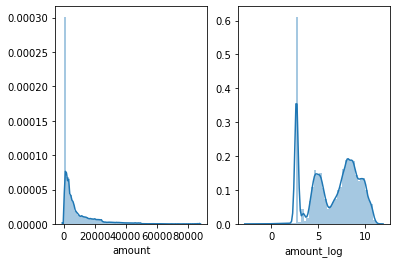

In [56]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
sns.distplot(numerical['amount'], ax=ax1)
sns.distplot(numerical['amount_log'], ax=ax2)
plt.show()

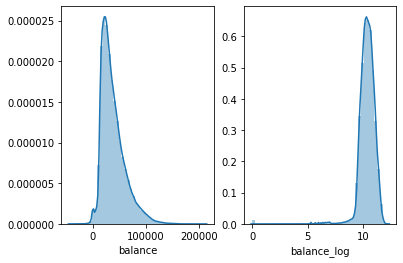

In [85]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
sns.distplot(numerical['balance'], ax=ax1)
sns.distplot(numerical['balance_log'], ax=ax2)
plt.show()

In [59]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)

In [60]:
query = '''select * from 
category c join film_category fc
on c.category_id = fc.category_id
join film on fc.film_id = film.film_id
where c.category_id < 5;'''
films = pd.read_sql_query(query, engine)
films.head()

,category_id,name,last_update,film_id,category_id,last_update,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,Action,2006-02-15 15:16:27,19,1,2006-02-15 15:37:09,19,AMADEUS HOLY,A Emotional Display of a Pioneer And a Technic...,2006,1,None,3,2.99,113,8.99,PG,"Commentaries,Deleted Scenes,Behind the Scenes",2020-10-24 21:17:18
1,1,Action,2006-02-15 15:16:27,21,1,2006-02-15 15:37:09,21,AMERICAN CIRCUS,A Insightful Drama of a Girl And a Astronaut w...,2006,1,None,3,2.99,129,8.99,R,"Commentaries,Behind the Scenes",2020-10-24 21:17:18
2,1,Action,2006-02-15 15:16:27,29,1,2006-02-15 15:37:09,29,ANTITRUST TOMATOES,A Fateful Yarn of a Womanizer And a Feminist w...,2006,1,None,3,2.99,168,8.99,NC-17,"Trailers,Commentaries,Deleted Scenes",2020-10-24 21:17:18
3,1,Action,2006-02-15 15:16:27,38,1,2006-02-15 15:37:09,38,ARK RIDGEMONT,A Beautiful Yarn of a Pioneer And a Monkey who...,2006,1,None,3,2.99,68,8.99,NC-17,"Trailers,Commentaries,Deleted Scenes,Behind th...",2020-10-24 21:17:18
4,1,Action,2006-02-15 15:16:27,56,1,2006-02-15 15:37:09,56,BAREFOOT MANCHURIAN,A Intrepid Story of a Cat And a Student who mu...,2006,1,None,3,2.99,129,8.99,G,"Trailers,Commentaries",2020-10-24 21:17:18


In [87]:
films['rental_rate'].value_counts()

2.99    247
Name: rental_rate, dtype: int64

In [ ]:
films = films.drop(['name', 'last_update', 'category_id'])

In [88]:
films['special_features']

0          Commentaries,Deleted Scenes,Behind the Scenes
1                         Commentaries,Behind the Scenes
2                   Trailers,Commentaries,Deleted Scenes
3      Trailers,Commentaries,Deleted Scenes,Behind th...
4                                  Trailers,Commentaries
5                                         Deleted Scenes
6                Trailers,Commentaries,Behind the Scenes
7                                         Deleted Scenes
8                            Commentaries,Deleted Scenes
9                                      Behind the Scenes
10                                              Trailers
11                      Deleted Scenes,Behind the Scenes
12             Trailers,Deleted Scenes,Behind the Scenes
13               Trailers,Commentaries,Behind the Scenes
14     Trailers,Commentaries,Deleted Scenes,Behind th...
15     Trailers,Commentaries,Deleted Scenes,Behind th...
16                                        Deleted Scenes
17                            T